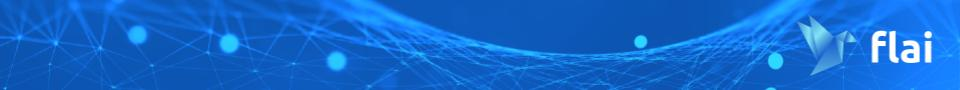

# **Aula 6 - Combinação de Modelos**

---
## **Importação e Preparação dos Dados**

In [1]:
# importação via github 
import pandas as pd
url = 'https://raw.githubusercontent.com/gitflai/DDS4/main/insurance.csv'
dados = pd.read_csv(url)

# mise un place
dados['smoker'] = dados['smoker'].map({'yes': 1, 'no': 0})
dados['charges'] = dados['charges']/1000 
dados = dados[['bmi', 'smoker', 'charges']]
dados.head()

# separação de variáveis preditoras e variával resposta
X = dados[['bmi', 'charges']]
y = dados['smoker'] 

---
## **Upgrade na Técnica de Validação: _K-FOLD REPETIDO_**

In [2]:
# Configuração da Validação Cruzada

from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedKFold

validacao = RepeatedKFold(n_splits = 10, n_repeats = 100)

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 

In [4]:
# Regressão Logística

modelo = LogisticRegression() 
medidas = cross_validate(modelo, X, y, cv = validacao, scoring = 'accuracy')
round(medidas['test_score'].mean(), 4)

0.9328

In [5]:
medidas

{'fit_time': array([0.0287168 , 0.02311158, 0.01447535, 0.01562762, 0.01747942,
        0.01613784, 0.01823688, 0.02295995, 0.01701689, 0.01858735,
        0.01586032, 0.01810503, 0.01669836, 0.01606679, 0.022331  ,
        0.01719832, 0.0199163 , 0.0194397 , 0.02168489, 0.0191164 ,
        0.01791453, 0.01600337, 0.01700234, 0.0164063 , 0.01910734,
        0.03655267, 0.02012944, 0.02238393, 0.0191884 , 0.01775956,
        0.01767206, 0.01612782, 0.01497293, 0.01795387, 0.01736784,
        0.01405072, 0.01639175, 0.0142262 , 0.01677418, 0.01460767,
        0.0189383 , 0.0222702 , 0.01938534, 0.02488899, 0.07085395,
        0.03438091, 0.06118345, 0.0542655 , 0.04761505, 0.03752875,
        0.01834869, 0.01919556, 0.02795529, 0.01939201, 0.02203202,
        0.04607987, 0.02050257, 0.03097343, 0.04398561, 0.04132771,
        0.0332644 , 0.03888106, 0.02274609, 0.02004695, 0.04166365,
        0.02848172, 0.04684567, 0.0893898 , 0.02353668, 0.02967715,
        0.03290677, 0.0484755 , 0.05

In [6]:
# KNN

modelo = KNeighborsClassifier(n_neighbors = 25) 
medidas = cross_validate(modelo, X, y, cv = validacao, scoring = 'accuracy')
round(medidas['test_score'].mean(), 4)

0.9614

In [7]:
# Árvore de Decisão

modelo = DecisionTreeClassifier(max_depth = 3) 
medidas = cross_validate(modelo, X, y, cv = validacao, scoring = 'accuracy')
round(medidas['test_score'].mean(), 4)

0.9625

In [ ]:
# Modelos de Classificação com 'Probabilidade'
# interpretar como propensão à classificação

modelo = LogisticRegression()
modelo.fit(X,y) 
modelo.predict_proba(X).round(4).tolist()

---
## **Combinação de Modelos HARD**

In [9]:
# Combinação por votos 'Hard'

from sklearn.ensemble import VotingClassifier
 
reglog = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors = 25)
arvore = DecisionTreeClassifier(max_depth = 3) 

modelos = [('Reg. Log.', reglog), 
           ('KNN', knn), 
           ('Árvore', arvore)]

modelo = VotingClassifier(modelos, voting = 'hard')

medidas = cross_validate(modelo, X, y, cv = validacao, scoring = 'accuracy')

round(medidas['test_score'].mean(), 4)

0.9637

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names

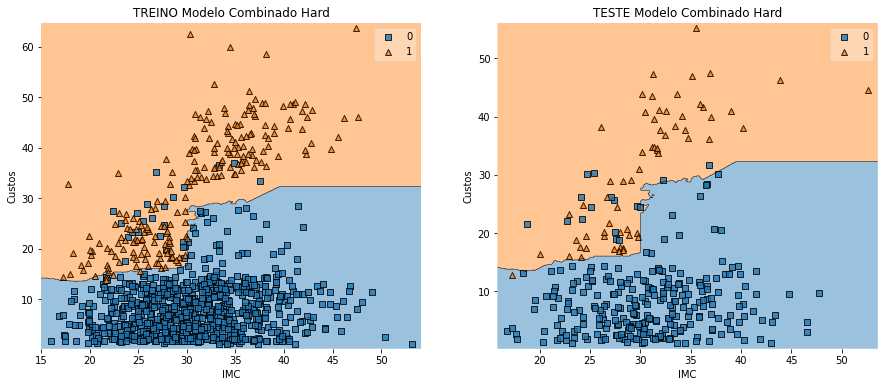

In [10]:
# Região de Decisão

from sklearn.model_selection import train_test_split 
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
  
Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)
modelo.fit(Xtreino, ytreino)

plt.figure(figsize = (15, 6))

plt.subplot(1, 2, 1)
plot_decision_regions(Xtreino.values, ytreino.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('TREINO Modelo Combinado Hard')  

plt.subplot(1, 2, 2)
plot_decision_regions(Xteste.values, yteste.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('TESTE Modelo Combinado Hard')   

plt.show()

---
## **Combinação de Modelos SOFT**

In [11]:
# Combinação por votos 'Soft'

from sklearn.ensemble import VotingClassifier
 
reglog = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors = 25) 
arvore = DecisionTreeClassifier(max_depth = 3) 

modelos = [('Reg. Log.', reglog), ('KNN', knn), ('Árvore', arvore)]

modelo = VotingClassifier(modelos, voting = 'soft')

medidas = cross_validate(modelo, X, y, cv = validacao, scoring = 'accuracy')

round(medidas['test_score'].mean(), 4)

0.9651

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names

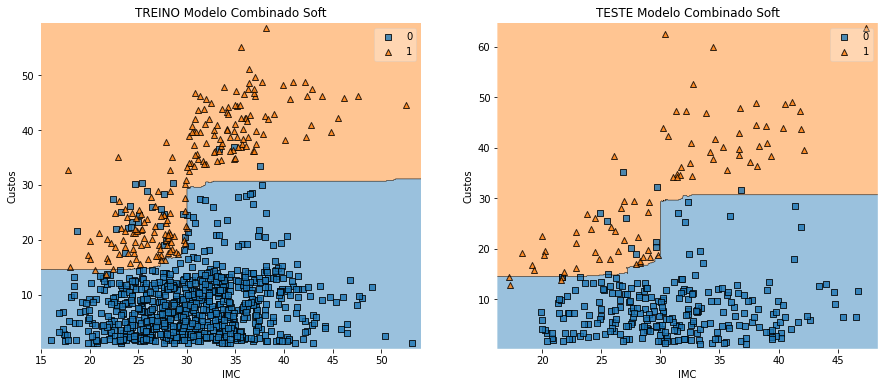

In [12]:
# Região de Decisão

Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)
modelo.fit(Xtreino, ytreino)

plt.figure(figsize = (15, 6))

plt.subplot(1, 2, 1)
plot_decision_regions(Xtreino.values, ytreino.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('TREINO Modelo Combinado Soft')  

plt.subplot(1, 2, 2)
plot_decision_regions(Xteste.values, yteste.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('TESTE Modelo Combinado Soft')   

plt.show()

---
# **Exercício Proposto**

# Investique mais possibilidades de combinações de modelos com o objetivo de encontrar uma configuração que melhore os resultados encontrados até então nesse conjunto de dados. 

---
**_#itstimetoflai_** 

#RESOLUÇÃO

Somei mais dois modelos de classificação suport vector machine classifier (https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) e Linear classifiers with stochastic gradient descent (SGD) (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)

Porém não obtive uma melhor acurácia, também plotei a matriz de confusão e as métricas de avaliação do modelo 'combinado'

In [14]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedKFold

validacao = RepeatedKFold(n_splits = 10, n_repeats = 100)

In [16]:
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [29]:
# Combinação por votos 'Hard'

from sklearn.ensemble import VotingClassifier

reglog = LogisticRegression() 
svmclassifier = svm.SVC()
clf = make_pipeline(StandardScaler(),SGDClassifier())
knn = KNeighborsClassifier(n_neighbors = 20, weights= 'distance')
arvore = DecisionTreeClassifier(max_depth = 3, min_samples_split = 4) 

modelos = [('Reg Log.', reglog),
           ('svm', svmclassifier),
           ('SGDC', clf), 
           ('KNN', knn), 
           ('Árvore', arvore)]

modelo = VotingClassifier(modelos, voting = 'hard')

medidas = cross_validate(modelo, X, y, cv = validacao, scoring = 'accuracy')

round(medidas['test_score'].mean(), 4)

0.9502

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have

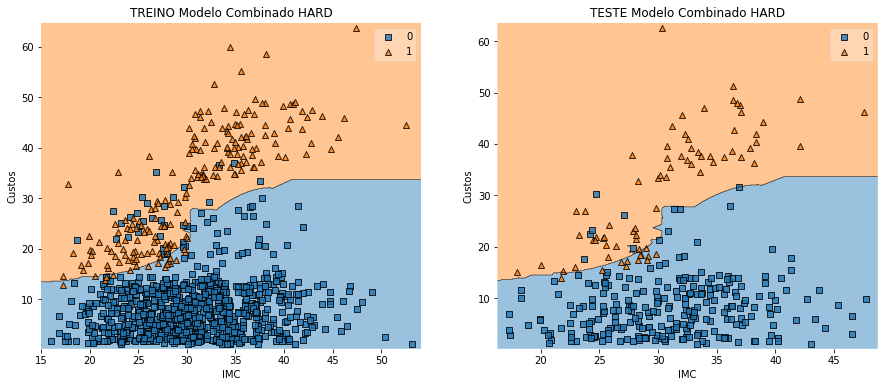

In [37]:
# Região de Decisão
from sklearn.model_selection import train_test_split 
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)
modelo.fit(Xtreino, ytreino)

plt.figure(figsize = (15, 6))

plt.subplot(1, 2, 1)
plot_decision_regions(Xtreino.values, ytreino.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('TREINO Modelo Combinado HARD')  

plt.subplot(1, 2, 2)
plot_decision_regions(Xteste.values, yteste.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('TESTE Modelo Combinado HARD')   

plt.show()

In [31]:
modelo.fit(Xtreino, ytreino)
resultado = modelo.predict(Xteste)

In [32]:
#matriz de confusão
from sklearn.metrics import accuracy_score #acuracia
print(pd.crosstab(yteste,resultado, rownames=['Real'], colnames=['Predito'], margins=True))

Predito    0   1  All
Real                 
0        247  11  258
1          8  69   77
All      255  80  335


In [33]:
from sklearn.metrics import classification_report # metricas de validação
print(classification_report(yteste, resultado))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       258
           1       0.86      0.90      0.88        77

    accuracy                           0.94       335
   macro avg       0.92      0.93      0.92       335
weighted avg       0.94      0.94      0.94       335



/usr/local/lib/python3.7/dist-packages/yellowbrick/classifier/base.py:234: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


0.9462686567164179

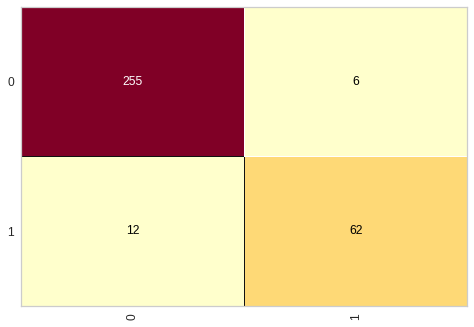

In [47]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(modelo, classes=[0,1])
cm.score(Xteste, yteste)